In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from cv2 import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings 
warnings.filterwarnings('ignore')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
train_data = pd.read_csv('csvTrainImages 13440x1024.csv', header = None).values
train_label = pd.read_csv('csvTrainLabel 13440x1.csv', header = None)
test_data = pd.read_csv('csvTestImages 3360x1024.csv', header = None).values
test_label = pd.read_csv('csvTestLabel 3360x1.csv', header = None)

In [3]:
train_label = train_label.squeeze()
test_label = test_label.squeeze()

In [4]:
characters = ["ا","ب","ت","ث","ج","ح","خ","د","ذ","ر","ز","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ك","ل","م","ن","ه","و","ي"]
characters_dict = dict(zip(np.arange(1,len(characters)+1), characters))

In [5]:
train_label = train_label.map(characters_dict).values
test_label = test_label.map(characters_dict).values

In [6]:
x_train = (train_data).reshape(-1,32,32,1)
x_test = (test_data).reshape(-1,32,32,1)

In [7]:
x_train,train_label = shuffle(x_train,train_label)
x_test,test_label = shuffle(x_test,test_label)

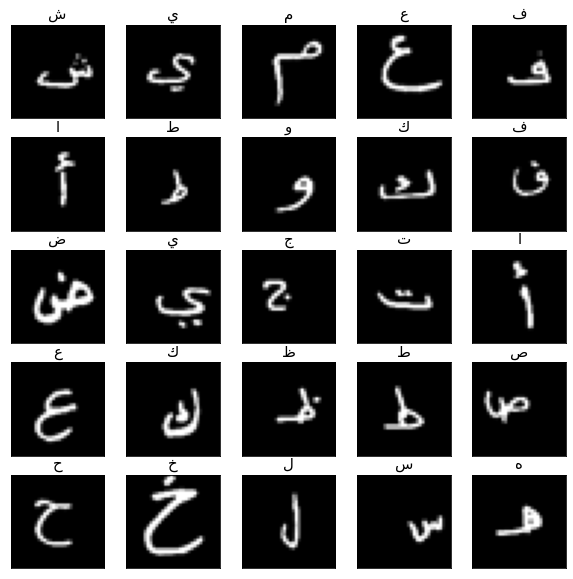

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(32,32).T,"gray")
    plt.title(train_label[i][0],fontsize = 15)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_label = lb.fit_transform(train_label)
test_label = lb.fit_transform(test_label)

In [10]:
train_datagen=ImageDataGenerator(
    zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1/255, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
    rotation_range=20, 
)
train_generator=train_datagen.flow(
    x_train ,train_label ,batch_size=64
)

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator=test_datagen.flow(
    x_test ,test_label ,batch_size=64
 
)

In [11]:
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]

In [12]:
model=Sequential() 

model.add(Conv2D(32,(5,5), padding="same",activation='relu',input_shape=(32,32,1)))
model.add(Conv2D(32,(5,5), padding="same",activation='relu'))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(28,activation='softmax'))

In [13]:
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                        

In [15]:
model.fit(
    train_generator, 
    epochs=50,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/50
210/210 [==============================] - 39s 180ms/step - loss: 2.7795 - accuracy: 0.1594 - val_loss: 1.6122 - val_accuracy: 0.4554 - lr: 0.0010
Epoch 2/50
210/210 [==============================] - 38s 180ms/step - loss: 1.8828 - accuracy: 0.3574 - val_loss: 1.0712 - val_accuracy: 0.6158 - lr: 0.0010
Epoch 3/50
210/210 [==============================] - 37s 177ms/step - loss: 1.4695 - accuracy: 0.4812 - val_loss: 0.8379 - val_accuracy: 0.7095 - lr: 0.0010
Epoch 4/50
210/210 [==============================] - 38s 179ms/step - loss: 1.2140 - accuracy: 0.5843 - val_loss: 0.5981 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 5/50
210/210 [==============================] - 37s 178ms/step - loss: 1.0274 - accuracy: 0.6516 - val_loss: 0.5331 - val_accuracy: 0.8149 - lr: 0.0010
Epoch 6/50
210/210 [==============================] - 39s 184ms/step - loss: 0.8866 - accuracy: 0.6955 - val_loss: 0.4549 - val_accuracy: 0.8452 - lr: 0.0010
Epoch 7/50
210/210 [==============================] 

210/210 [==============================] - 37s 174ms/step - loss: 0.3821 - accuracy: 0.8815 - val_loss: 0.1815 - val_accuracy: 0.9402 - lr: 0.0010
Epoch 22/50
210/210 [==============================] - 38s 180ms/step - loss: 0.3640 - accuracy: 0.8827 - val_loss: 0.1761 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 23/50
210/210 [==============================] - 38s 182ms/step - loss: 0.3556 - accuracy: 0.8898 - val_loss: 0.1775 - val_accuracy: 0.9446 - lr: 0.0010
Epoch 24/50
210/210 [==============================] - 40s 190ms/step - loss: 0.3425 - accuracy: 0.8897 - val_loss: 0.1843 - val_accuracy: 0.9438 - lr: 0.0010


<AxesSubplot:>

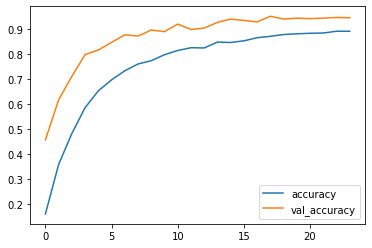

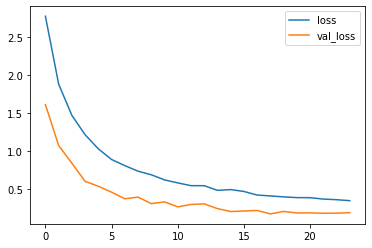

In [16]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [17]:
model.evaluate(test_generator)

53/53 [==============================] - 2s 31ms/step - loss: 0.1843 - accuracy: 0.9438


[0.18428285419940948, 0.9437500238418579]

In [18]:
model.save('Stark.model')



INFO:tensorflow:Assets written to: Stark.model\assets
